# Imports and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/wholesome_customers_data.csv")

## Quick Data Overview

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# EDA

In [7]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: xlabel='Milk', ylabel='Grocery'>

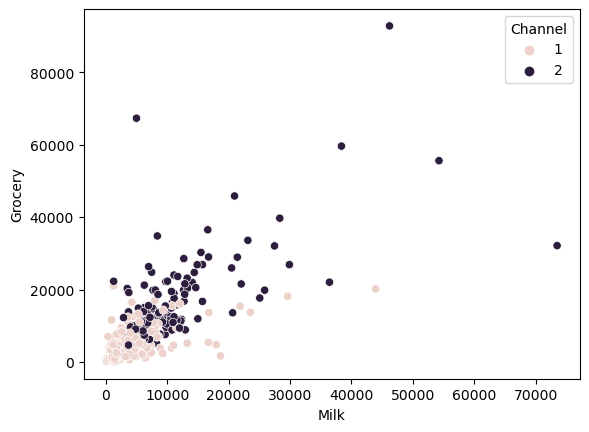

In [8]:
sns.scatterplot(df, x="Milk", y="Grocery", hue="Channel")

<Axes: xlabel='Milk', ylabel='Count'>

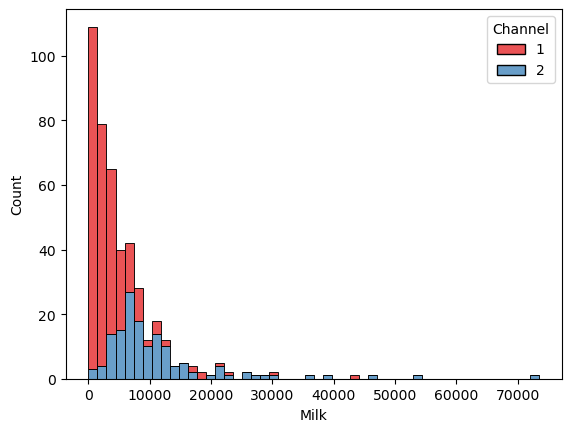

In [68]:
sns.histplot(df, x="Milk", hue="Channel", palette="Set1", multiple="stack")

In [11]:
spend_df = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

<Axes: >

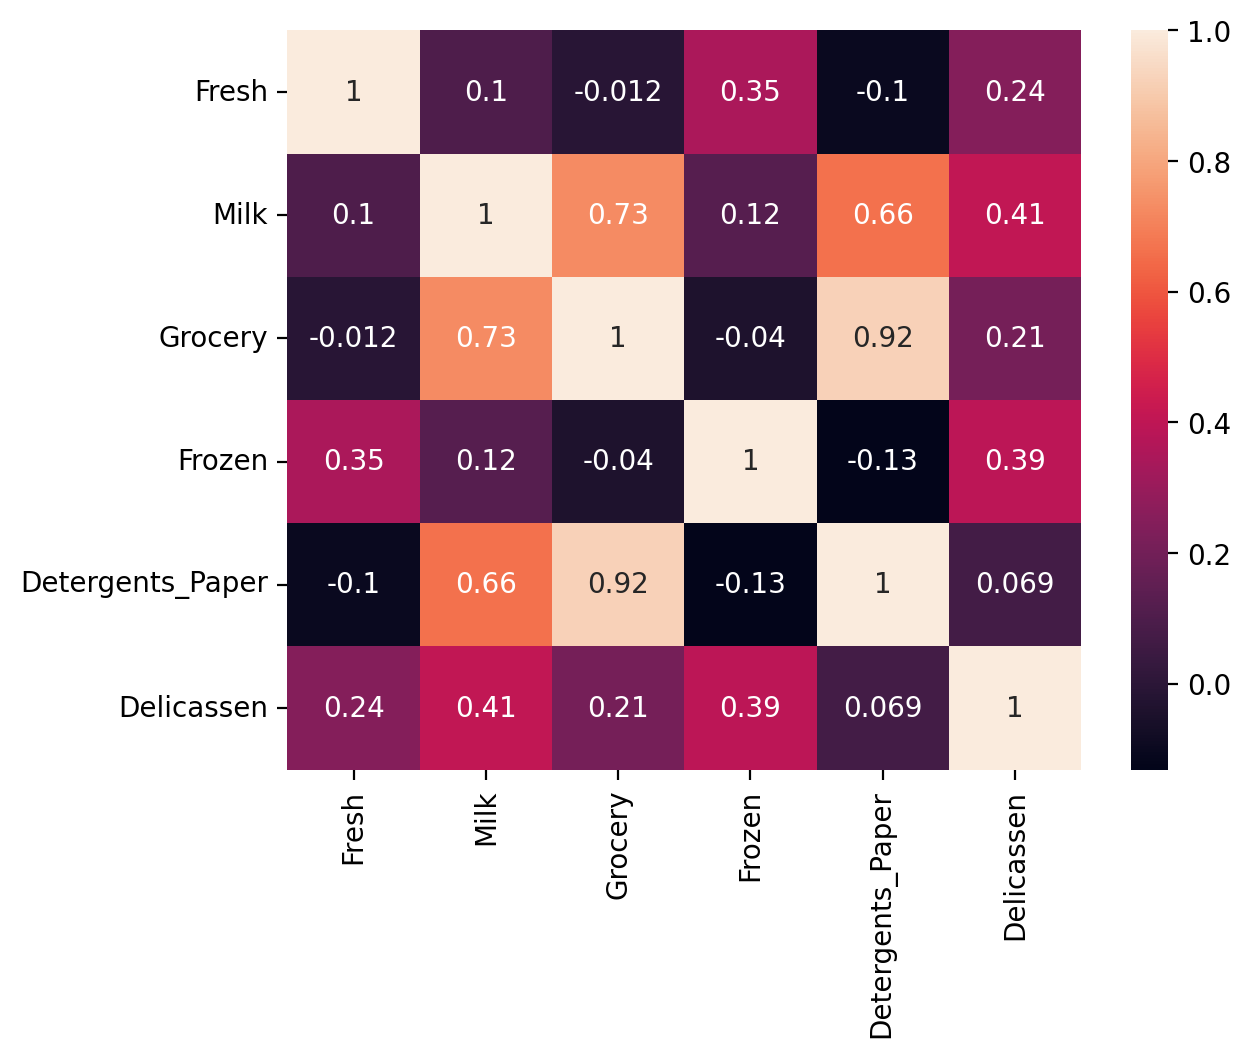

In [15]:
plt.figure(dpi=200)
sns.heatmap(spend_df.corr(), annot=True)

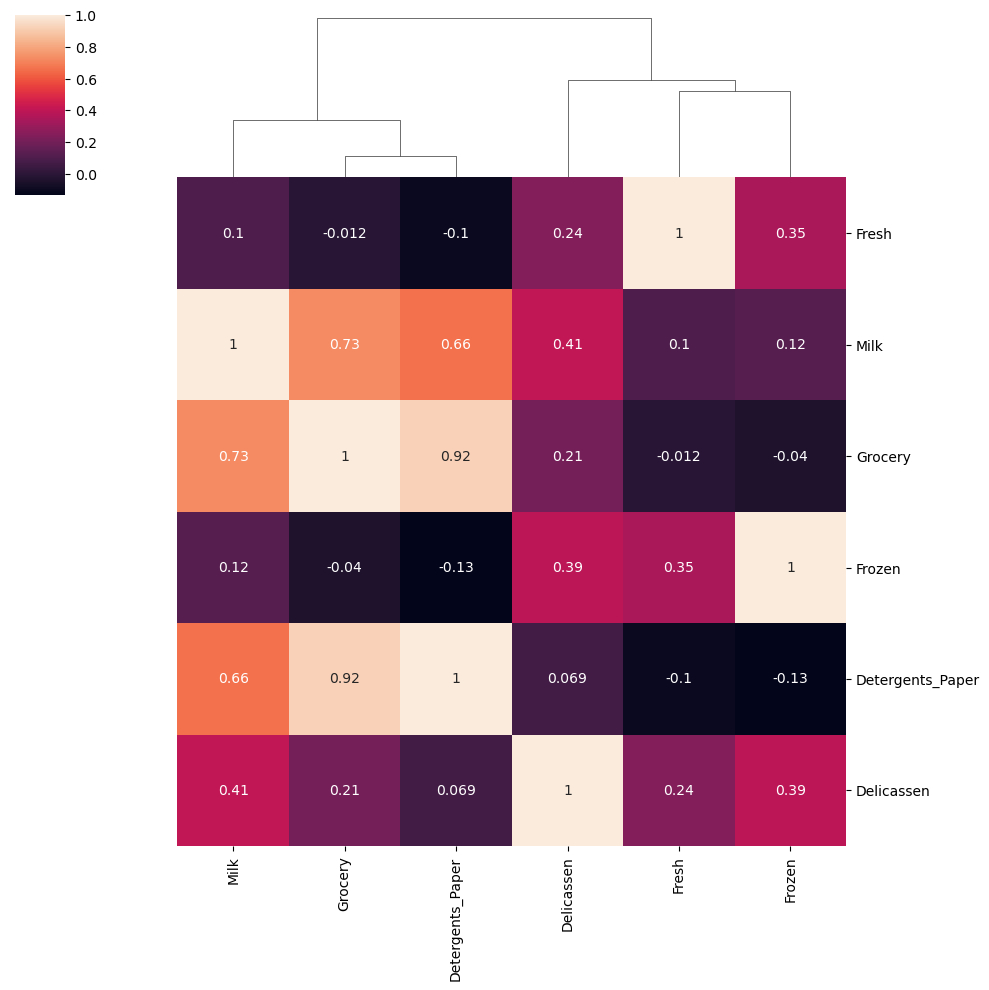

In [69]:
sns.clustermap(spend_df.corr(), annot=True, row_cluster=False)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


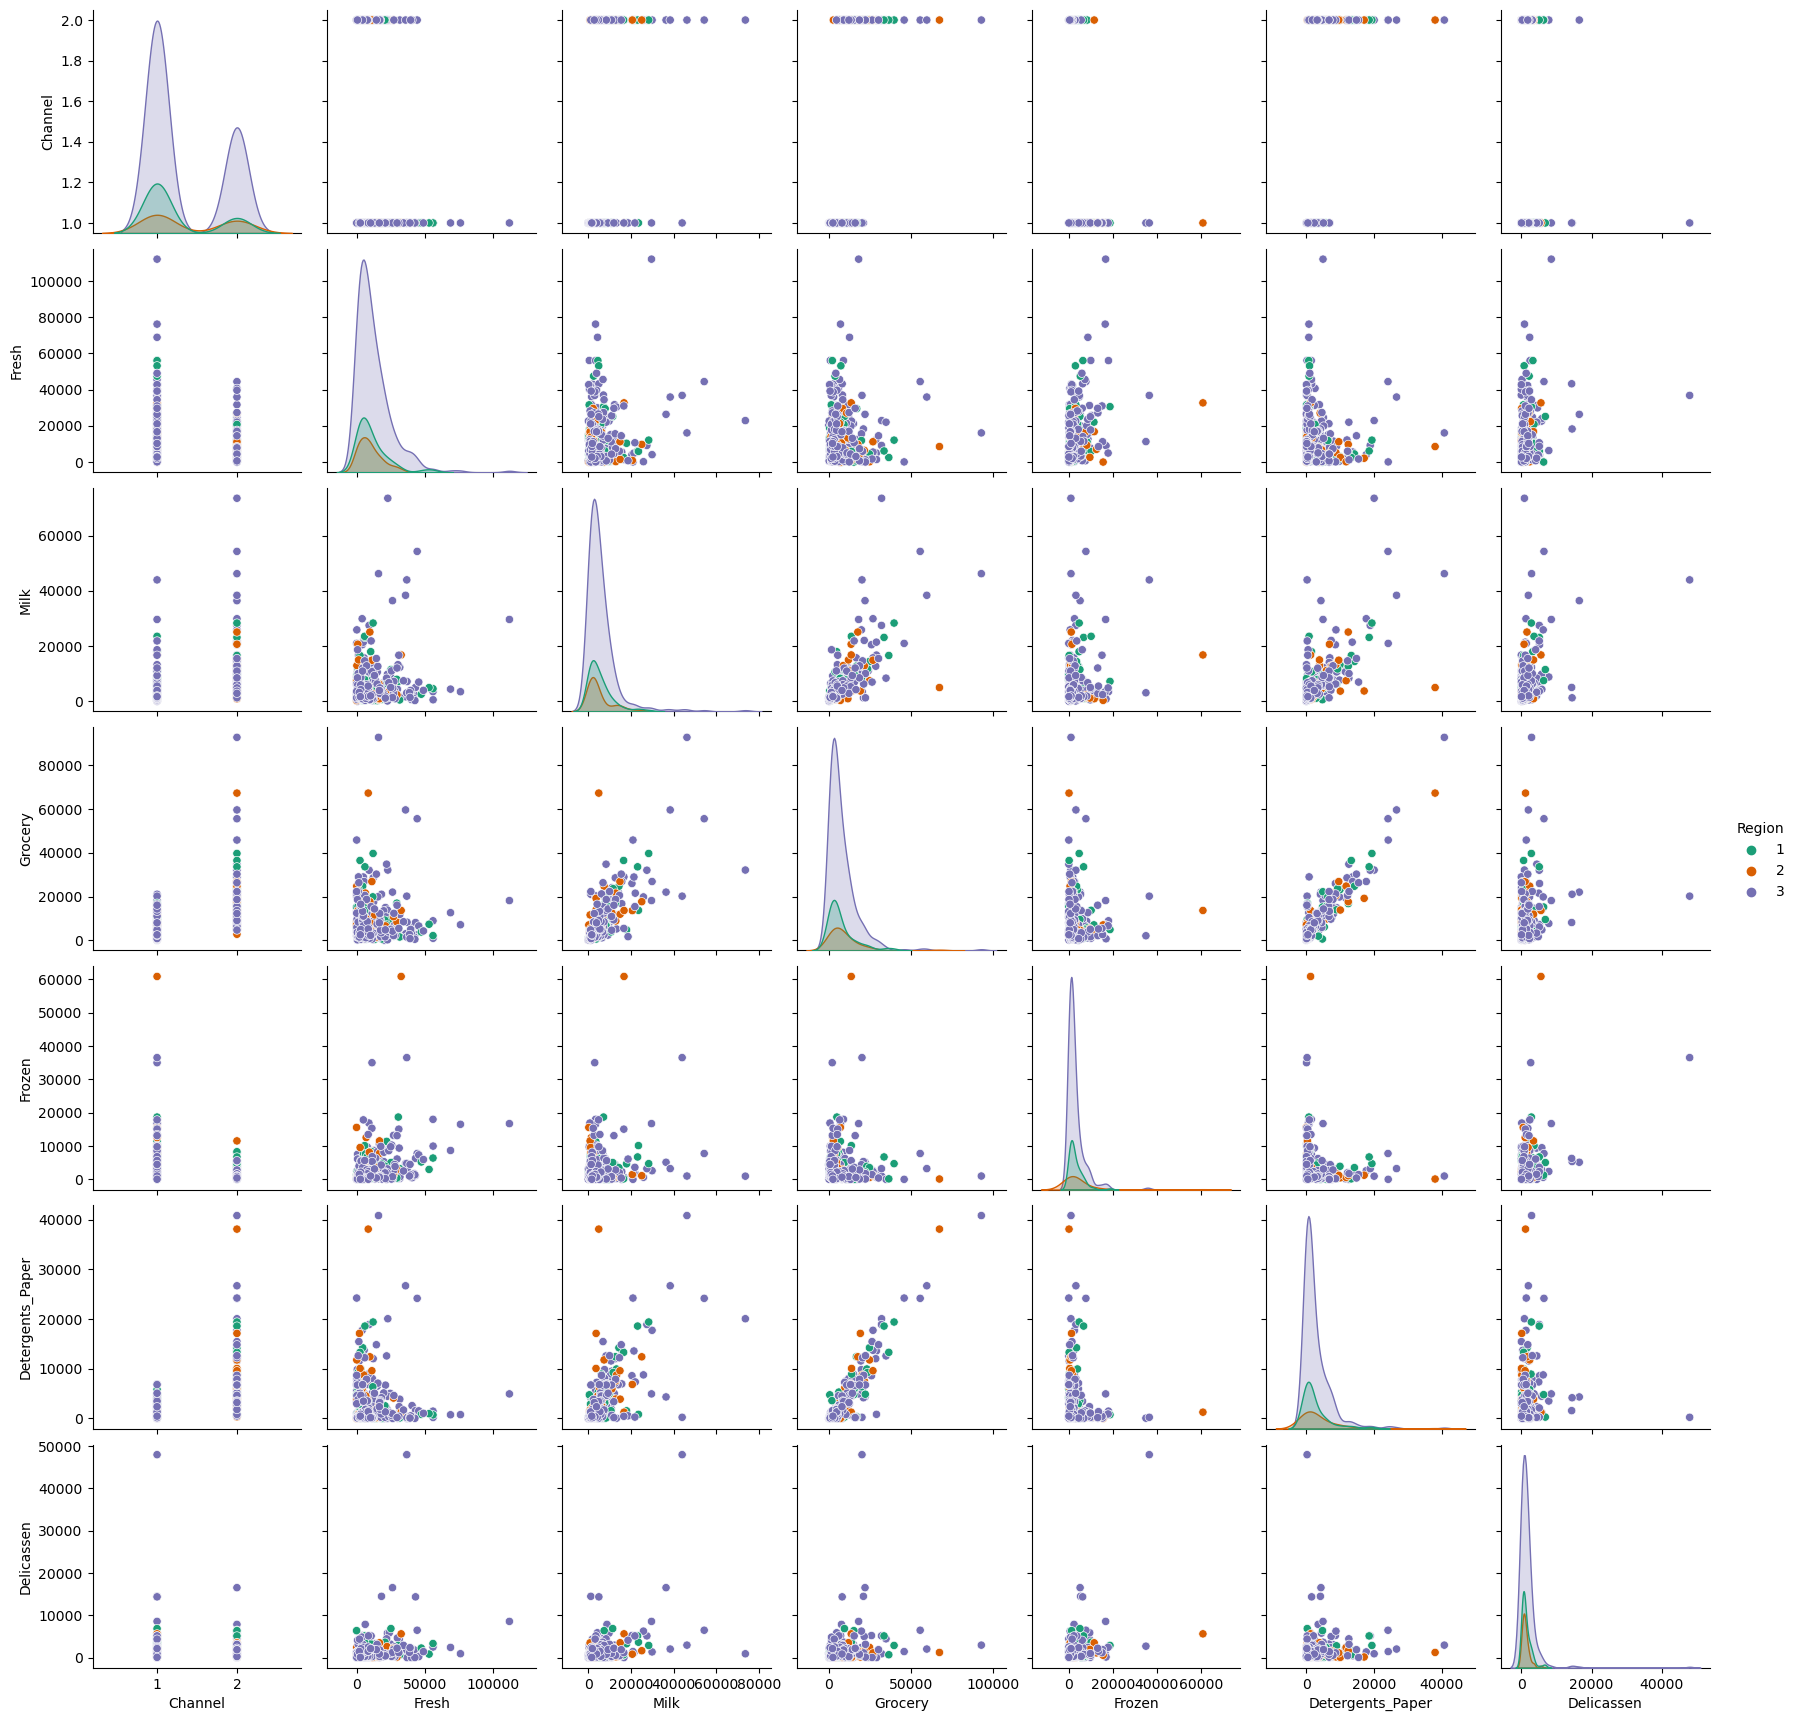

In [20]:
sns.pairplot(df, hue="Region", palette="Dark2");

# DBSCAN Model

#### Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaled_df = scaler.fit_transform(df)

In [24]:
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

#### Epsilon elbow search

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
outlier_percent = []
outliers = []

for eps in np.linspace(0.01, 4, 50):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_df)
    
    outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

#### Plotting the Curves

<Axes: >

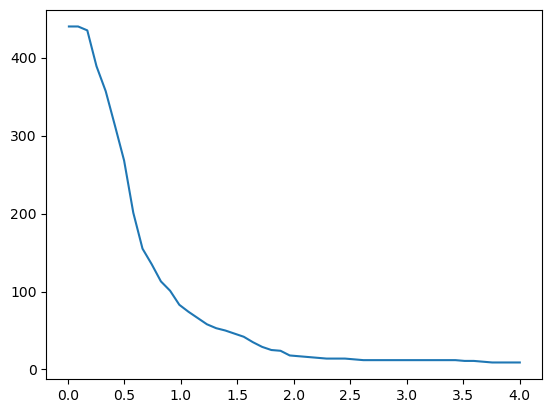

In [27]:
sns.lineplot(x=np.linspace(0.01, 4, 50), y=outliers)

(0.0, 3.0)

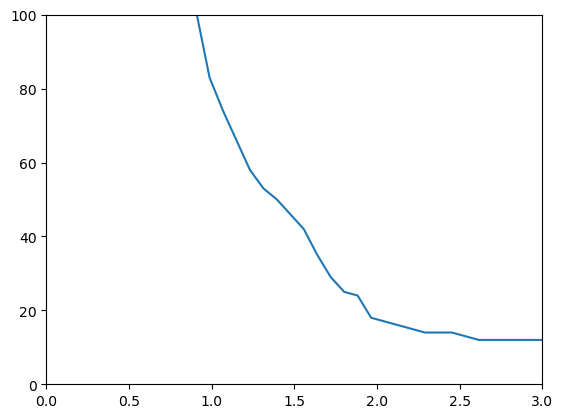

In [29]:
sns.lineplot(x=np.linspace(0.01, 4, 50), y=outliers)
plt.ylim(0, 100)
plt.xlim(0, 3)

In [30]:
# From the graph, an epsilon of 2 seems to be ideal. No significant changes after the value of 2

In [31]:
model = DBSCAN(eps=2)

In [34]:
labels = model.fit_predict(scaled_df)

In [36]:
df["Labels"] = labels

In [37]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


<Axes: xlabel='Milk', ylabel='Grocery'>

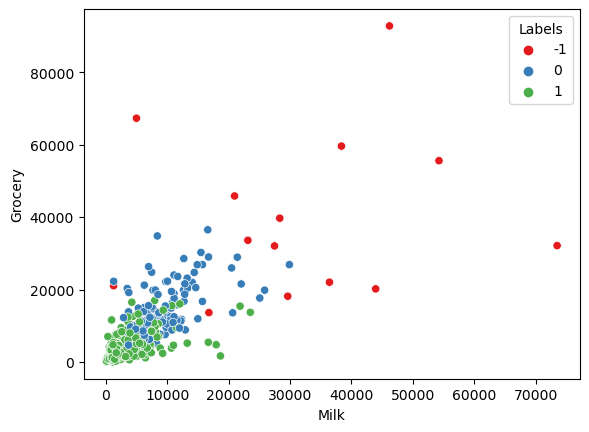

In [70]:
sns.scatterplot(df, x="Milk", y="Grocery", hue="Labels", palette="Set1")

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

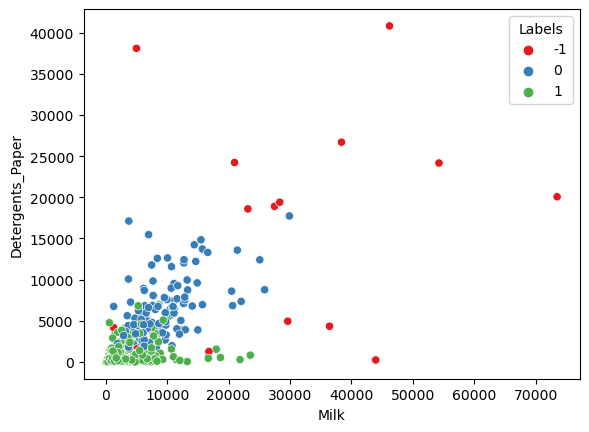

In [71]:
sns.scatterplot(df, x="Milk", y="Detergents_Paper", hue="Labels", palette="Set1")

In [72]:
cat_means = df.drop(["Channel", "Region"], axis=1).groupby("Labels").mean()

In [73]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


<Axes: ylabel='Labels'>

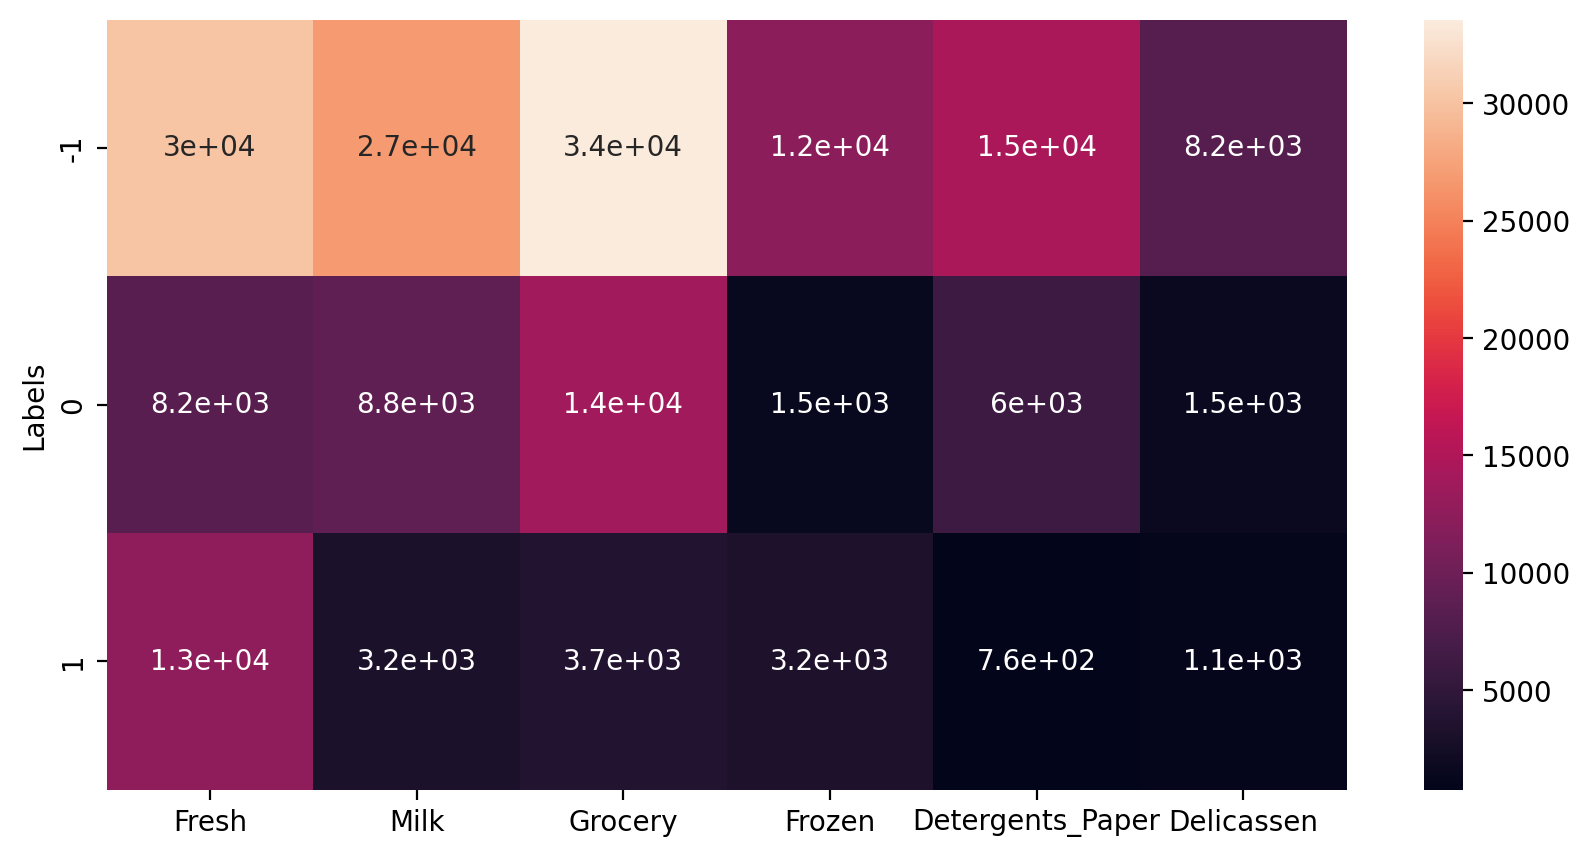

In [76]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(cat_means, annot=True)

<Axes: ylabel='Labels'>

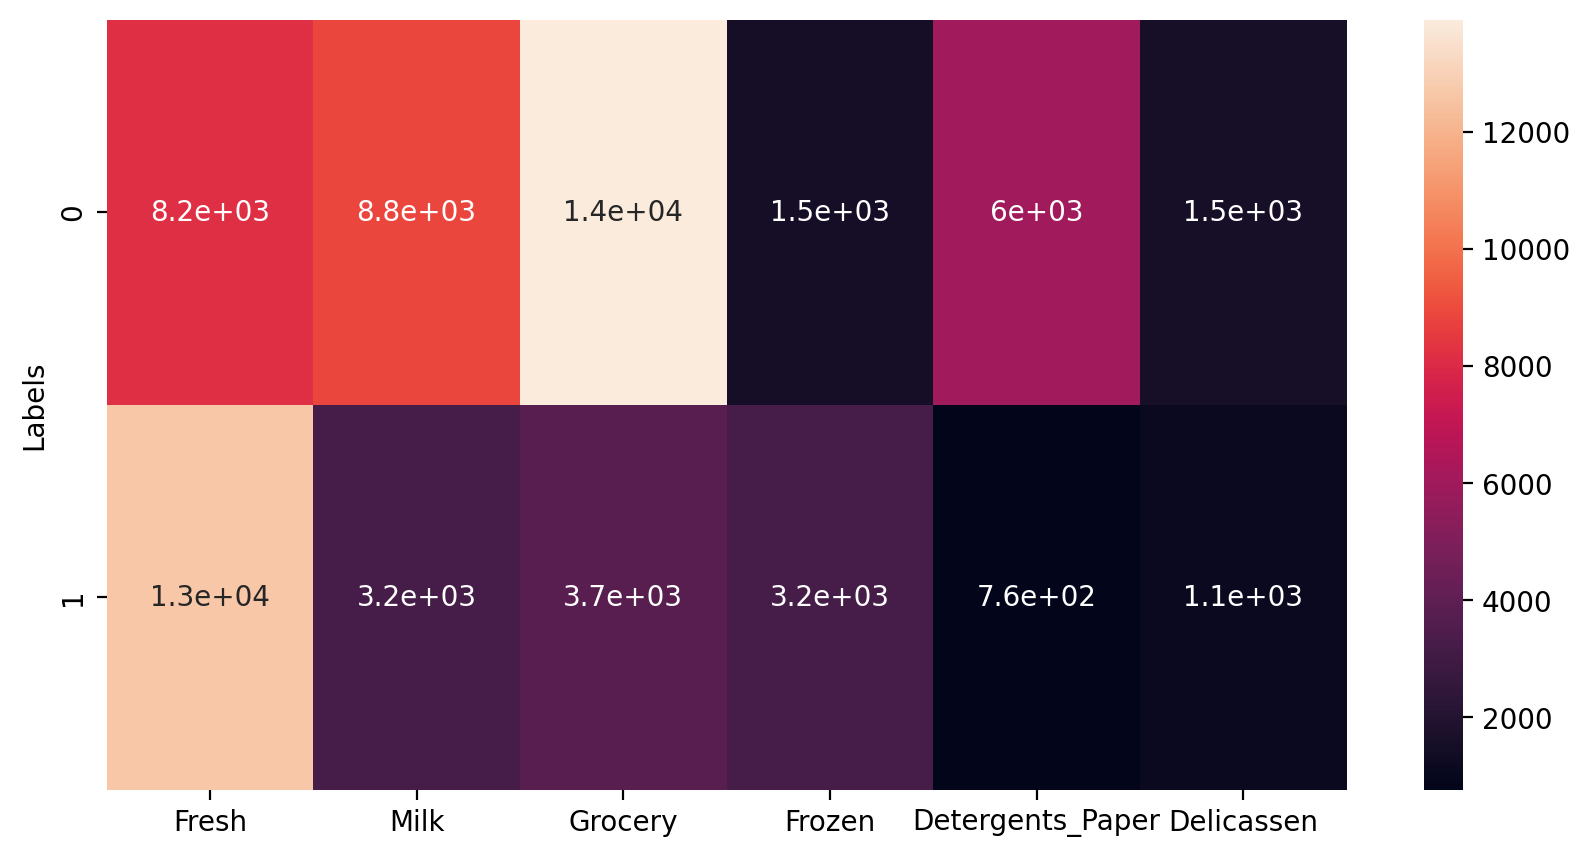

In [78]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(cat_means.loc[[0,1]], annot=True)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [79]:
df_norm = scaler.fit_transform(cat_means)

In [82]:
scaled = pd.DataFrame(df_norm, cat_means.index, cat_means.columns)

<Axes: ylabel='Labels'>

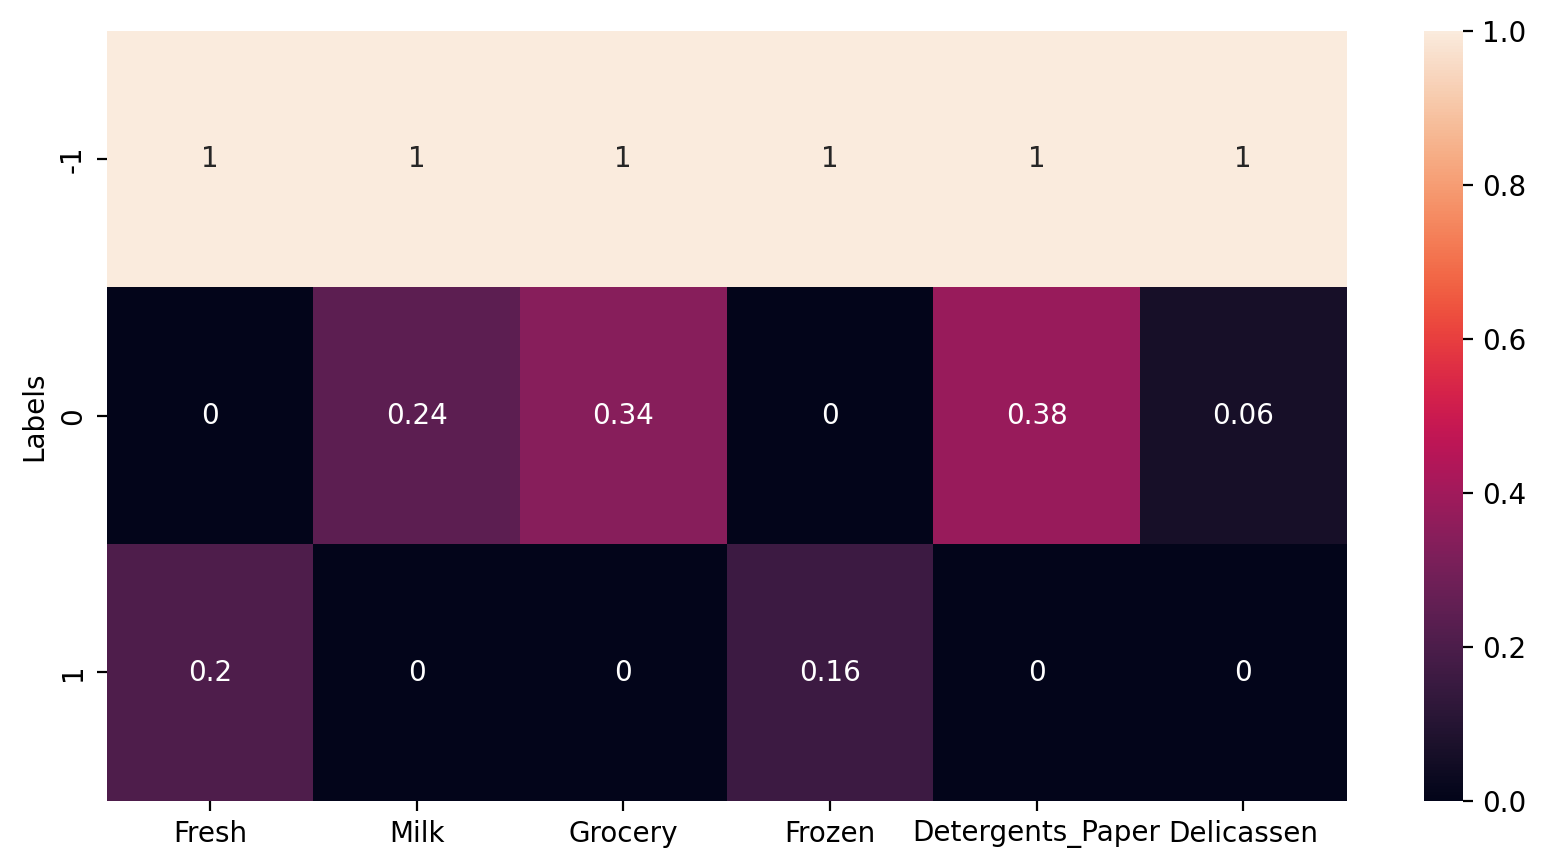

In [86]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(scaled, annot=True)

<Axes: ylabel='Labels'>

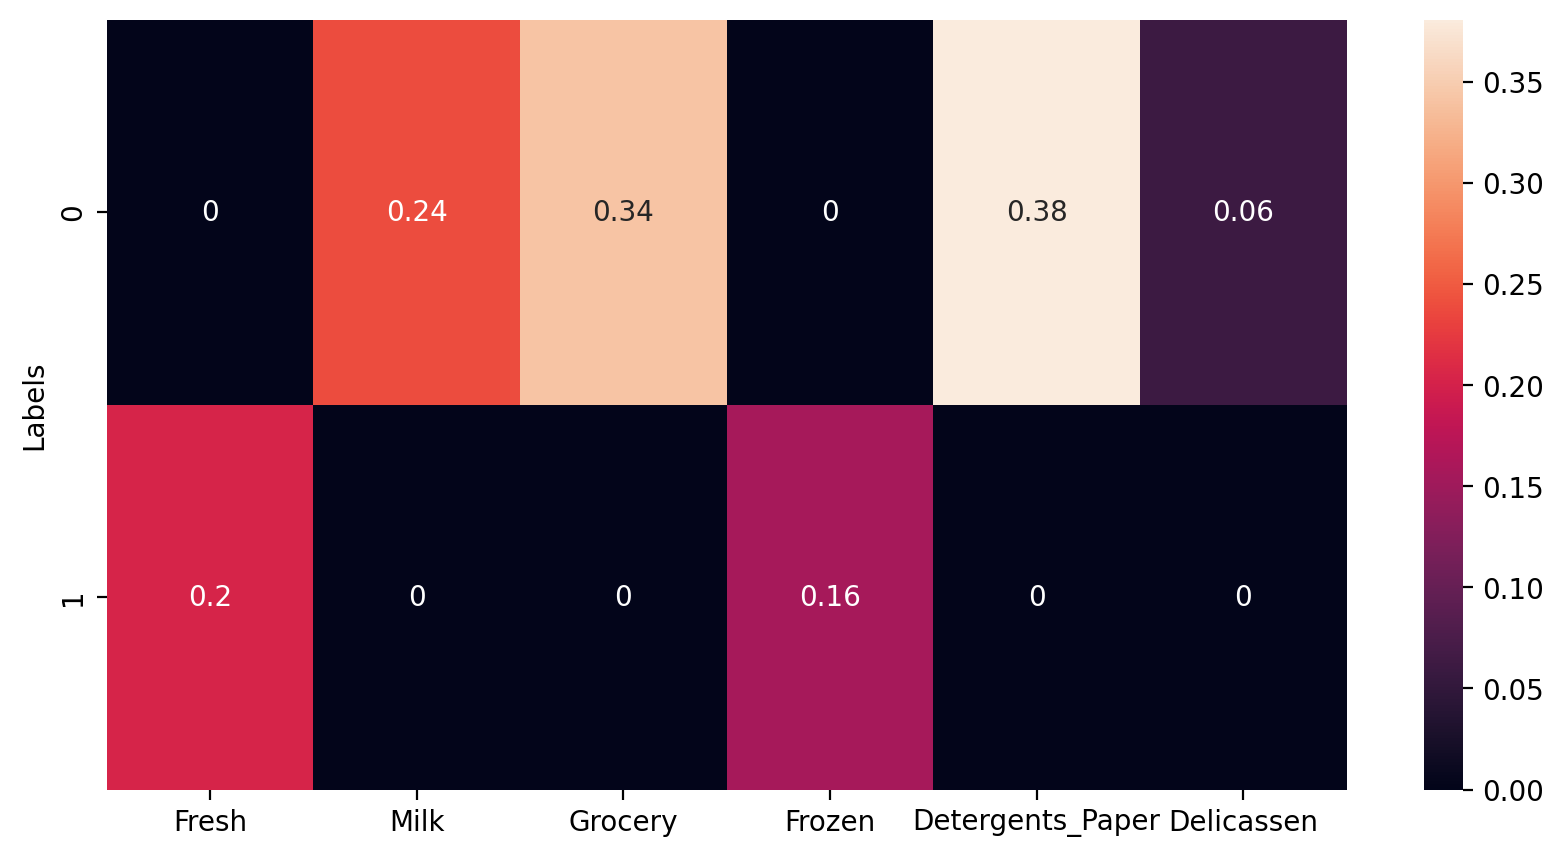

In [85]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(scaled.loc[[0, 1]], annot=True)